In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
%cd drive/MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [ ]:
# 1. 나눔 폰트 설치 (Nanum)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
# 2. matplotlib의 폰트를 Nanum 폰트로 지정
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

## 1. 11개 자치구 클러스터링 

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

### 1-1. 노원구

In [ ]:
# 노원구 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

노원_df = pd.read_csv('/content/drive/MyDrive/project/12. 공체시설 부족 자치구/2020 노원구.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =노원_df['동']
노원_df = 노원_df.iloc[:,1:]
노원_df

,인구 수,생활보호대상자 비율
0,0.239958,0.202333
1,0.439263,0.868683
2,0.578952,0.419148
3,0.910423,0.437892
4,1.000000,0.077524
5,0.454661,0.763955
6,0.224031,0.330750
7,0.321660,0.052144
8,0.436667,0.106413
9,0.137314,0.651127


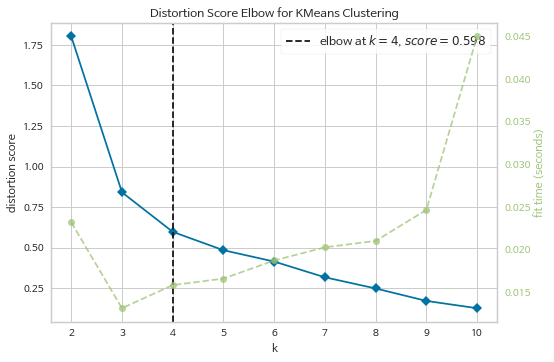

In [ ]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(노원_df)
Elbow_M.show()

plt.show()

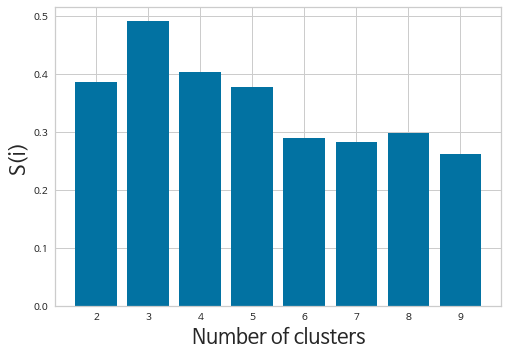

In [ ]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(노원_df)
    silhouette_scores.append(silhouette_score(노원_df, m1.fit_predict(노원_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [ ]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  3


In [ ]:
k = 3

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(노원_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
노원_df['cluster'] = model.fit_predict(노원_df)

In [ ]:
노원_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

0    9
1    5
2    5
Name: cluster, dtype: int64

In [ ]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.22942301, 0.17213812],
       [0.44829953, 0.78776607],
       [0.82858903, 0.26563135]])

In [ ]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 노원_df['인구 수']
cluster_df['생활보호대상자 비율'] = 노원_df['생활보호대상자 비율']
cluster_df['cluster'] = 노원_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,월계1동,0.239958,0.202333,0
1,월계2동,0.439263,0.868683,1
2,월계3동,0.578952,0.419148,2
3,공릉1동,0.910423,0.437892,2
4,공릉2동,1.000000,0.077524,2
5,하계1동,0.454661,0.763955,1
6,하계2동,0.224031,0.330750,0
7,중계본동,0.321660,0.052144,0
8,중계1동,0.436667,0.106413,0
9,중계4동,0.137314,0.651127,1


In [ ]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,월계1동,0.239958,0.202333,0
1,월계2동,0.439263,0.868683,1
2,월계3동,0.578952,0.419148,2
3,공릉1동,0.910423,0.437892,2
4,공릉2동,1.000000,0.077524,2
5,하계1동,0.454661,0.763955,1
6,하계2동,0.224031,0.330750,0
7,중계본동,0.321660,0.052144,0
8,중계1동,0.436667,0.106413,0
9,중계4동,0.137314,0.651127,1


#### **군집화**

In [ ]:
# 클러스터별로 동 이름 출력하기

for i in range(number_of_clusters):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['월계1동', '하계2동', '중계본동', '중계1동', '상계2동', '상계5동', '상계8동', '상계9동', '상계10동']
cluster 1 :  ['월계2동', '하계1동', '중계4동', '중계2.3동', '상계3.4동']
cluster 2 :  ['월계3동', '공릉1동', '공릉2동', '상계1동', '상계6.7동']


#### **입지선정**
- cluster0 : 2개 (월계1동, 상계9동)
- cluster1 : 2개 (하계1동, 월계2동)
- cluster2 : 3개 (상계1동, 상계6.7동, 공릉1동)

In [ ]:
# cluster0

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 0:
    lst.append([(cluster_df['population'][i]-centers[0][0])**2 + (cluster_df['ratio'][i]-centers[0][1])**2, i])  # 각 군집의 중심점에서부터 동까지의 거리
  
lst

[[0.0010227190791686294, 0],
 [0.025186957520726493, 6],
 [0.022906178139503387, 7],
 [0.04726974813105615, 8],
 [0.01775844851012809, 11],
 [0.08201650461881016, 12],
 [0.02965823027665046, 13],
 [0.014703910209011496, 14],
 [0.06261785627481849, 15]]

In [ ]:
# 각 군집의 중심점에서 가까운 순서대로 동 나열

lst.sort()
lst

[[0.0010227190791686294, 0],
 [0.014703910209011496, 14],
 [0.01775844851012809, 11],
 [0.022906178139503387, 7],
 [0.025186957520726493, 6],
 [0.02965823027665046, 13],
 [0.04726974813105615, 8],
 [0.06261785627481849, 15],
 [0.08201650461881016, 12]]

In [ ]:
# 각 군집별로 추가 설치가 필요한 개수만큼 위에서 정렬한 리스트에서 동 가져오기

cluster_df.loc[[0, 14]]

,dong,population,ratio,cluster
0,월계1동,0.239958,0.202333,0
14,상계9동,0.157948,0.074183,0


In [ ]:
# cluster1

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 1:
    lst.append([(cluster_df['population'][i]-centers[1][0])**2 + (cluster_df['ratio'][i]-centers[1][1])**2, i])
  
lst

[[0.006629279710594978, 1],
 [0.0006074369807858863, 5],
 [0.11538263365694101, 9],
 [0.1617750947255251, 16],
 [0.01839345663190729, 17]]

In [ ]:
lst.sort()
lst

[[0.0006074369807858863, 5],
 [0.006629279710594978, 1],
 [0.01839345663190729, 17],
 [0.11538263365694101, 9],
 [0.1617750947255251, 16]]

In [ ]:
cluster_df.loc[[5, 1]]

,dong,population,ratio,cluster
5,하계1동,0.454661,0.763955,1
1,월계2동,0.439263,0.868683,1


In [ ]:
# cluster2

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 2:
    lst.append([(cluster_df['population'][i]-centers[2][0])**2 + (cluster_df['ratio'][i]-centers[2][1])**2, i])
  
lst

[[0.08588585575596581, 2],
 [0.036370525203633416, 3],
 [0.06476613992781012, 4],
 [0.014537223486119211, 10],
 [0.03377481620574291, 18]]

In [ ]:
lst.sort()
lst

[[0.014537223486119211, 10],
 [0.03377481620574291, 18],
 [0.036370525203633416, 3],
 [0.06476613992781012, 4],
 [0.08588585575596581, 2]]

In [ ]:
cluster_df.loc[[10, 18, 3]]

,dong,population,ratio,cluster
10,상계1동,0.949140,0.263459,2
18,상계6.7동,0.704430,0.130134,2
3,공릉1동,0.910423,0.437892,2


#### **시각화**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '생활보호대상자 비율')

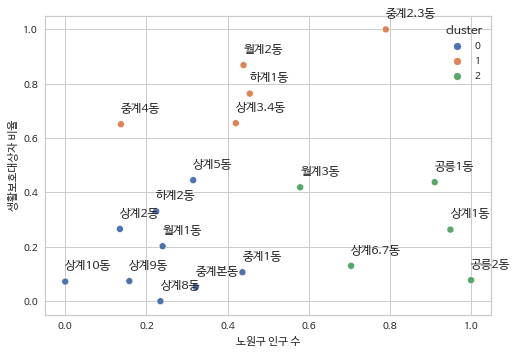

In [ ]:
sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

for i in range(len(cluster_df)):
  plt.annotate(cluster_df['dong'][i], (cluster_df['population'][i], cluster_df['ratio'][i]+0.05))


plt.xlabel('노원구 인구 수')
plt.ylabel('생활보호대상자 비율')

In [ ]:
# cluster_df.to_csv('/content/drive/MyDrive/project/14. 시각화/nowon_cluster.csv')

### 1-2. 강북구

In [ ]:
강북_df = pd.read_csv('/content/drive/MyDrive/project/12. 공체시설 부족 자치구/2020 강북구.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] = 강북_df['동']

강북_df =  강북_df.iloc[:,1:]
강북_df

,인구 수,생활보호대상자 비율
0,0.186015,0.151616
1,0.000000,0.529514
2,0.068126,1.000000
3,0.316168,0.252051
4,0.324323,0.141416
5,0.472775,0.197506
6,0.526390,0.224265
7,0.396751,0.105809
8,0.923976,0.039133
9,0.727302,0.245137


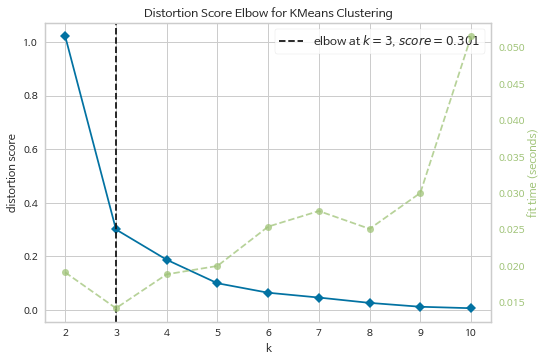

In [ ]:
km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(강북_df)
Elbow_M.show()

plt.show()

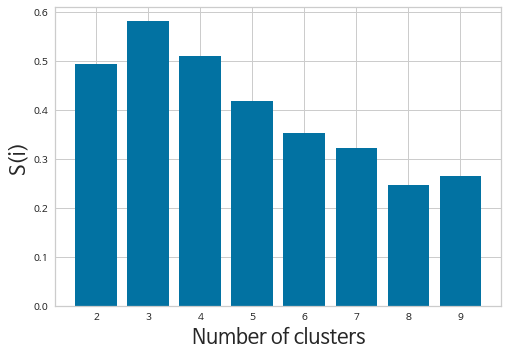

In [ ]:
silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(강북_df)
    silhouette_scores.append(silhouette_score(강북_df, m1.fit_predict(강북_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [ ]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  3


In [ ]:
k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(강북_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
강북_df['cluster'] = model.fit_predict(강북_df)

In [ ]:
강북_df['cluster'].value_counts()

0    7
1    4
2    2
Name: cluster, dtype: int64

In [ ]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.35905997, 0.16714555],
       [0.90362142, 0.12011687],
       [0.03406318, 0.76475683]])

In [ ]:
cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 강북_df['인구 수']
cluster_df['생활보호대상자 비율'] = 강북_df['생활보호대상자 비율']
cluster_df['cluster'] = 강북_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,번1동,0.186015,0.151616,0
1,번2동,0.000000,0.529514,2
2,번3동,0.068126,1.000000,2
3,수유1동,0.316168,0.252051,0
4,수유2동,0.324323,0.141416,0
5,수유3동,0.472775,0.197506,0
6,삼양동,0.526390,0.224265,0
7,미아동,0.396751,0.105809,0
8,송중동,0.923976,0.039133,1
9,송천동,0.727302,0.245137,1


In [ ]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,번1동,0.186015,0.151616,0
1,번2동,0.000000,0.529514,2
2,번3동,0.068126,1.000000,2
3,수유1동,0.316168,0.252051,0
4,수유2동,0.324323,0.141416,0
5,수유3동,0.472775,0.197506,0
6,삼양동,0.526390,0.224265,0
7,미아동,0.396751,0.105809,0
8,송중동,0.923976,0.039133,1
9,송천동,0.727302,0.245137,1


#### **군집화**

In [ ]:
for i in range(number_of_clusters):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['번1동', '수유1동', '수유2동', '수유3동', '삼양동', '미아동', '우이동']
cluster 1 :  ['송중동', '송천동', '삼각산동', '인수동']
cluster 2 :  ['번2동', '번3동']


#### **입지선정**
- cluster0 : 1개 (수유2동)
- cluster1 : 3개 (송중동, 인수동, 삼각산동) 
- cluster2 : 0개 

In [ ]:
# cluster0

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 0:
    lst.append([(cluster_df['population'][i]-centers[0][0])**2 + (cluster_df['ratio'][i]-centers[0][1])**2, i])
  
lst

[[0.030185684878897525, 0],
 [0.009048662793441561, 3],
 [0.0018686751762605402, 4],
 [0.013852921344274197, 5],
 [0.03126205552825011, 6],
 [0.005182774360372922, 7],
 [0.009503197278133934, 11]]

In [ ]:
lst.sort()
lst

[[0.0018686751762605402, 4],
 [0.005182774360372922, 7],
 [0.009048662793441561, 3],
 [0.009503197278133934, 11],
 [0.013852921344274197, 5],
 [0.030185684878897525, 0],
 [0.03126205552825011, 6]]

In [ ]:
cluster_df.loc[[4]]

,dong,population,ratio,cluster
4,수유2동,0.324323,0.141416,0


In [ ]:
# cluster1

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 1:
    lst.append([(cluster_df['population'][i]-centers[1][0])**2 + (cluster_df['ratio'][i]-centers[1][1])**2, i])
  
lst

[[0.00697264870894896, 8],
 [0.04671856352458795, 9],
 [0.023716892301937454, 10],
 [0.0093387925317893, 12]]

In [ ]:
lst.sort()
lst

[[0.00697264870894896, 8],
 [0.0093387925317893, 12],
 [0.023716892301937454, 10],
 [0.04671856352458795, 9]]

In [ ]:
cluster_df.loc[[8, 12, 10]]

,dong,population,ratio,cluster
8,송중동,0.923976,0.039133,1
12,인수동,0.963208,0.196197,1
10,삼각산동,1.000000,0.000000,1


#### **시각화**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '생활보호대상자 비율')

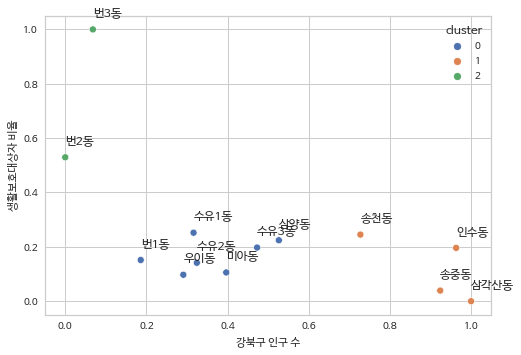

In [ ]:
sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

for i in range(len(cluster_df)):
  plt.annotate(cluster_df['dong'][i], (cluster_df['population'][i], cluster_df['ratio'][i]+0.05))


plt.xlabel('강북구 인구 수')
plt.ylabel('생활보호대상자 비율')

In [ ]:
# cluster_df.to_csv('/content/drive/MyDrive/project/14. 시각화/gangbuk_cluster.csv')

### 1-3. 관악구

In [ ]:
관악_df = pd.read_csv('/content/drive/MyDrive/project/12. 공체시설 부족 자치구/2020 관악구.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] = 관악_df['동']

관악_df =  관악_df.iloc[:,1:]
관악_df

,인구 수,생활보호대상자 비율
0,0.140050,0.000000
1,0.464102,0.505377
2,0.000000,0.439080
3,0.683419,0.378522
4,0.090618,0.123142
5,0.002280,0.358849
6,0.523382,0.225194
7,0.381003,0.315592
8,0.173620,0.642033
9,0.421995,0.461830


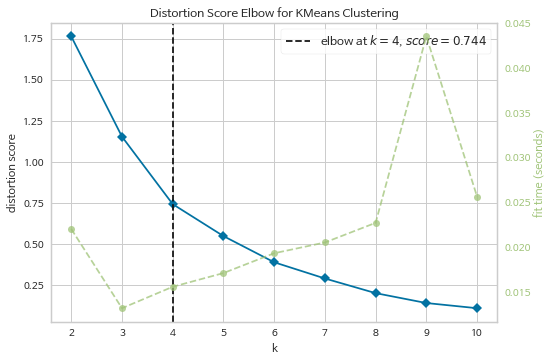

In [ ]:
km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(관악_df)
Elbow_M.show()

plt.show()

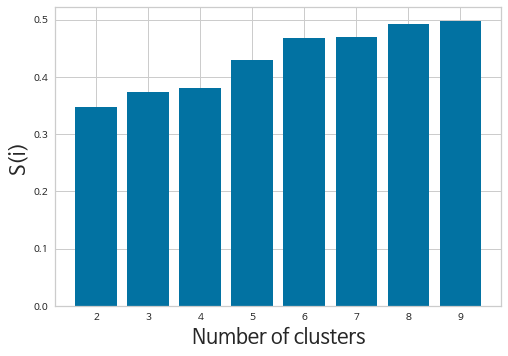

In [ ]:
silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(관악_df)
    silhouette_scores.append(silhouette_score(관악_df, m1.fit_predict(관악_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [ ]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  9


In [ ]:
k = 4

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(관악_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
관악_df['cluster'] = model.fit_predict(관악_df)

In [ ]:
관악_df['cluster'].value_counts()

1    8
2    6
3    4
0    3
Name: cluster, dtype: int64

In [ ]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.57126225, 0.85167496],
       [0.35058698, 0.29640107],
       [0.06916012, 0.5240863 ],
       [0.84483846, 0.37798005]])

In [ ]:
cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 관악_df['인구 수']
cluster_df['생활보호대상자 비율'] = 관악_df['생활보호대상자 비율']
cluster_df['cluster'] = 관악_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,남현동,0.140050,0.000000,1
1,보라매동,0.464102,0.505377,1
2,청림동,0.000000,0.439080,2
3,행운동,0.683419,0.378522,3
4,낙성대동,0.090618,0.123142,1
5,중앙동,0.002280,0.358849,2
6,인헌동,0.523382,0.225194,1
7,서원동,0.381003,0.315592,1
8,신원동,0.173620,0.642033,2
9,서림동,0.421995,0.461830,1


In [ ]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,남현동,0.140050,0.000000,1
1,보라매동,0.464102,0.505377,1
2,청림동,0.000000,0.439080,2
3,행운동,0.683419,0.378522,3
4,낙성대동,0.090618,0.123142,1
5,중앙동,0.002280,0.358849,2
6,인헌동,0.523382,0.225194,1
7,서원동,0.381003,0.315592,1
8,신원동,0.173620,0.642033,2
9,서림동,0.421995,0.461830,1


#### **군집화**

In [ ]:
for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['성현동', '난곡동', '삼성동']
cluster 1 :  ['남현동', '보라매동', '낙성대동', '인헌동', '서원동', '서림동', '신림동', '대학동']
cluster 2 :  ['청림동', '중앙동', '신원동', '신사동', '난향동', '조원동']
cluster 3 :  ['행운동', '은천동', '청룡동', '미성동']


#### **입지선정**
- cluster0 : 2개 (난곡동, 삼성동)
- cluster1 : 0개 
- cluster2 : 1개 (청림동)
- cluster3 : 1개 (미성동)

In [ ]:
# cluster0

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 0:
    lst.append([(cluster_df['population'][i]-centers[0][0])**2 + (cluster_df['ratio'][i]-centers[0][1])**2, i])
  
lst

[[0.06032183809511641, 16],
 [0.0032617704156423775, 18],
 [0.05169108235337127, 19]]

In [ ]:
lst.sort()
lst

[[0.0032617704156423775, 18],
 [0.05169108235337127, 19],
 [0.06032183809511641, 16]]

In [ ]:
cluster_df.loc[[18, 19]]

,dong,population,ratio,cluster
18,난곡동,0.598768,0.901727,0
19,삼성동,0.398952,1.000000,0


In [ ]:
# cluster2

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 2:
    lst.append([(cluster_df['population'][i]-centers[2][0])**2 + (cluster_df['ratio'][i]-centers[2][1])**2, i])
  
lst

[[0.012009190876777962, 2],
 [0.03177646975778429, 5],
 [0.024823332389512363, 8],
 [0.11626733860366416, 10],
 [0.013704503219780478, 12],
 [0.02189999179477907, 13]]

In [ ]:
lst.sort()
lst

[[0.012009190876777962, 2],
 [0.013704503219780478, 12],
 [0.02189999179477907, 13],
 [0.024823332389512363, 8],
 [0.03177646975778429, 5],
 [0.11626733860366416, 10]]

In [ ]:
cluster_df.loc[[2]]

,dong,population,ratio,cluster
2,청림동,0.0,0.43908,2


In [ ]:
# cluster3

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 3:
    lst.append([(cluster_df['population'][i]-centers[3][0])**2 + (cluster_df['ratio'][i]-centers[3][1])**2, i])
  
lst

[[0.026056523644176044, 3],
 [0.048742030926181734, 15],
 [0.04960175155829536, 17],
 [0.006696272869564705, 20]]

In [ ]:
lst.sort()
lst

[[0.006696272869564705, 20],
 [0.026056523644176044, 3],
 [0.048742030926181734, 15],
 [0.04960175155829536, 17]]

In [ ]:
cluster_df.loc[[20]]

,dong,population,ratio,cluster
20,미성동,0.779858,0.328242,3


#### **시각화**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '생활보호대상자 비율')

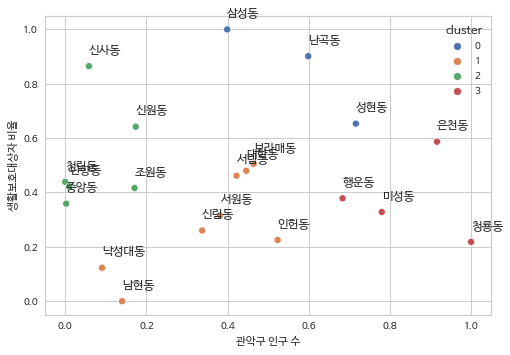

In [ ]:
sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

for i in range(len(cluster_df)):
  plt.annotate(cluster_df['dong'][i], (cluster_df['population'][i], cluster_df['ratio'][i]+0.05))


plt.xlabel('관악구 인구 수')
plt.ylabel('생활보호대상자 비율')

In [ ]:
# cluster_df.to_csv('/content/drive/MyDrive/project/14. 시각화/gwanak_cluster.csv')

### 1-4. 도봉구

In [ ]:
도봉_df = pd.read_csv('/content/drive/MyDrive/project/12. 공체시설 부족 자치구/2020 도봉구.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] = 도봉_df['동']


도봉_df =  도봉_df.iloc[:,1:]
도봉_df

,인구 수,생활보호대상자 비율
0,0.490909,0.438584
1,0.322631,0.447932
2,0.162476,0.387934
3,0.315603,0.042551
4,0.956415,0.466148
5,0.391425,1.000000
6,0.874984,0.040898
7,0.709091,0.129808
8,1.000000,0.253323
9,0.000000,0.747687


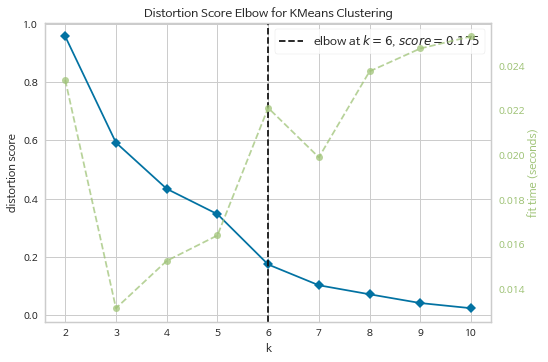

In [ ]:
km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(도봉_df)
Elbow_M.show()

plt.show()

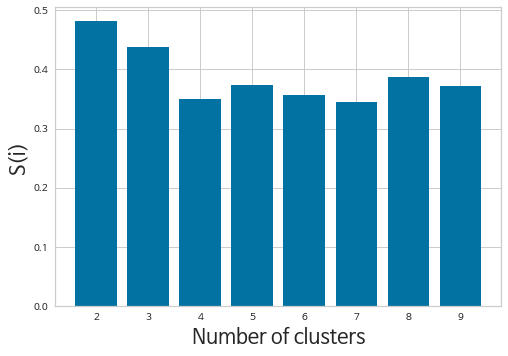

In [ ]:
silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(도봉_df)
    silhouette_scores.append(silhouette_score(도봉_df, m1.fit_predict(도봉_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [ ]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  2


#### 적절한 k값 찾기

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


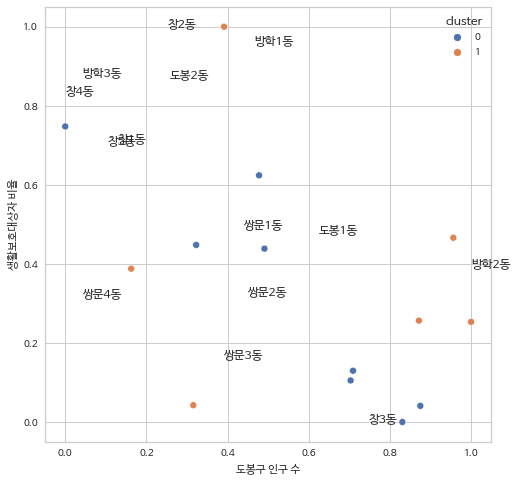

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


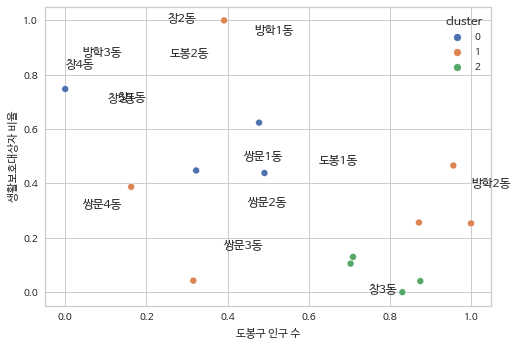

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


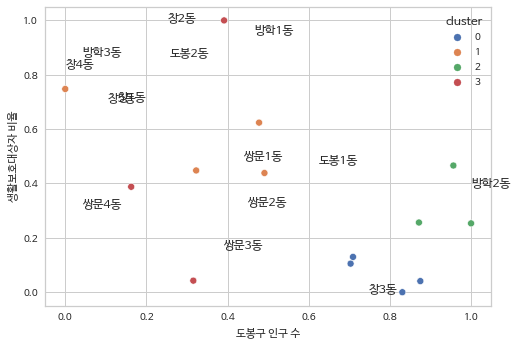

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


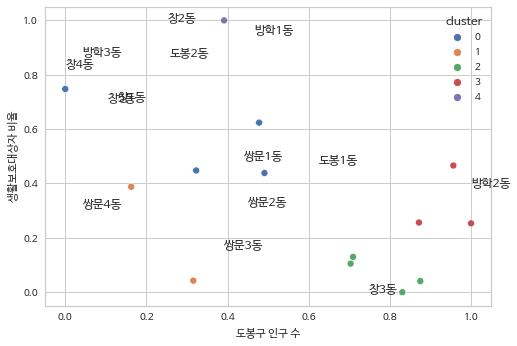

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


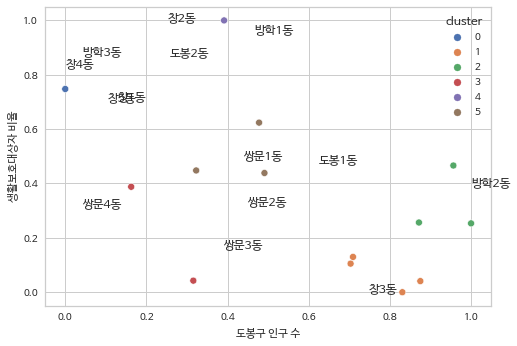

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


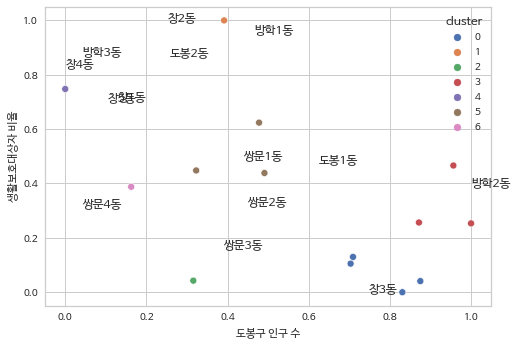

In [ ]:
plt.figure(figsize = (8, 8))

for i in range(2,8):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(도봉_df)
  도봉_df['cluster'] = model.fit_predict(도봉_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 도봉_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 도봉_df['생활보호대상자 비율']
  cluster_df['cluster'] = 도봉_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('도봉구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=4로 결정

In [ ]:
k = 4

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(도봉_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
도봉_df['cluster'] = model.fit_predict(도봉_df)

In [ ]:
도봉_df['cluster'].value_counts()

2    5
1    4
3    3
0    2
Name: cluster, dtype: int64

In [ ]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.19571244, 0.87384334],
       [0.77948098, 0.06896484],
       [0.35384913, 0.38819098],
       [0.94266065, 0.32530958]])

In [ ]:
cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 도봉_df['인구 수']
cluster_df['생활보호대상자 비율'] = 도봉_df['생활보호대상자 비율']
cluster_df['cluster'] = 도봉_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,쌍문1동,0.490909,0.438584,2
1,쌍문2동,0.322631,0.447932,2
2,쌍문3동,0.162476,0.387934,2
3,쌍문4동,0.315603,0.042551,2
4,방학1동,0.956415,0.466148,3
5,방학2동,0.391425,1.000000,0
6,방학3동,0.874984,0.040898,1
7,창1동,0.709091,0.129808,1
8,창2동,1.000000,0.253323,3
9,창3동,0.000000,0.747687,0


In [ ]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,쌍문1동,0.490909,0.438584,2
1,쌍문2동,0.322631,0.447932,2
2,쌍문3동,0.162476,0.387934,2
3,쌍문4동,0.315603,0.042551,2
4,방학1동,0.956415,0.466148,3
5,방학2동,0.391425,1.000000,0
6,방학3동,0.874984,0.040898,1
7,창1동,0.709091,0.129808,1
8,창2동,1.000000,0.253323,3
9,창3동,0.000000,0.747687,0


#### **군집화**

In [ ]:
for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['방학2동', '창3동']
cluster 1 :  ['방학3동', '창1동', '창4동', '창5동']
cluster 2 :  ['쌍문1동', '쌍문2동', '쌍문3동', '쌍문4동', '도봉1동']
cluster 3 :  ['방학1동', '창2동', '도봉2동']


#### **입지선정**
- cluster0 : 1개 (방학2동)
- cluster1 : 1개 (창5동)
- cluster2 : 2개 (쌍문2동, 쌍문1동)
- cluster3 : 0개 

In [ ]:
# cluster1

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 1:
    lst.append([(cluster_df['population'][i]-centers[1][0])**2 + (cluster_df['ratio'][i]-centers[1][1])**2, i])
  
lst

[[0.009908535959045145, 6],
 [0.008656713588128346, 7],
 [0.0073784996520007895, 10],
 [0.0071345579989227775, 11]]

In [ ]:
lst.sort()
lst

[[0.0071345579989227775, 11],
 [0.0073784996520007895, 10],
 [0.008656713588128346, 7],
 [0.009908535959045145, 6]]

In [ ]:
cluster_df.loc[[11]]

,dong,population,ratio,cluster
11,창5동,0.703159,0.105153,1


In [ ]:
# cluster2

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 2:
    lst.append([(cluster_df['population'][i]-centers[2][0])**2 + (cluster_df['ratio'][i]-centers[2][1])**2, i])
  
lst

[[0.021324869061799777, 0],
 [0.0045435593443958365, 1],
 [0.03662380903589932, 2],
 [0.12092992605909207, 3],
 [0.07090565686003353, 12]]

In [ ]:
lst.sort()
lst

[[0.0045435593443958365, 1],
 [0.021324869061799777, 0],
 [0.03662380903589932, 2],
 [0.07090565686003353, 12],
 [0.12092992605909207, 3]]

In [ ]:
cluster_df.loc[[1, 0]]

,dong,population,ratio,cluster
1,쌍문2동,0.322631,0.447932,2
0,쌍문1동,0.490909,0.438584,2


In [ ]:
# cluster0

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 0:
    lst.append([(cluster_df['population'][i]-centers[0][0])**2 + (cluster_df['ratio'][i]-centers[0][1])**2, i])
  
lst

[[0.05421886465666814, 5], [0.0542188646566682, 9]]

In [ ]:
lst.sort()
lst

[[0.05421886465666814, 5], [0.0542188646566682, 9]]

In [ ]:
cluster_df.loc[[5]]

,dong,population,ratio,cluster
5,방학2동,0.391425,1.0,0


#### **시각화**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '생활보호대상자 비율')

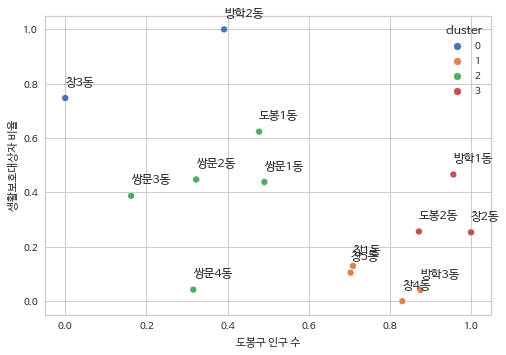

In [ ]:
sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

for i in range(len(cluster_df)):
  plt.annotate(cluster_df['dong'][i], (cluster_df['population'][i], cluster_df['ratio'][i]+0.05))


plt.xlabel('도봉구 인구 수')
plt.ylabel('생활보호대상자 비율')

In [ ]:
# cluster_df.to_csv('/content/drive/MyDrive/project/14. 시각화/dobong_cluster.csv')

### 1-5. 강서구

In [ ]:
강서_df = pd.read_csv('/content/drive/MyDrive/project/12. 공체시설 부족 자치구/2020 강서구.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] = 강서_df['동']


강서_df =  강서_df.iloc[:,1:]
강서_df

,인구 수,생활보호대상자 비율
0,0.707079,0.000000
1,0.251340,0.029012
2,0.170860,0.062718
3,0.440091,0.738492
4,0.525701,0.198022
5,1.000000,0.135656
6,0.106697,0.180734
7,0.189472,0.104623
8,0.175938,0.181971
9,0.271834,0.133629


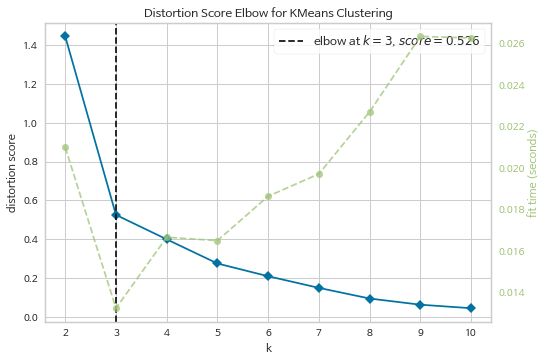

In [ ]:
km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(강서_df)
Elbow_M.show()

plt.show()

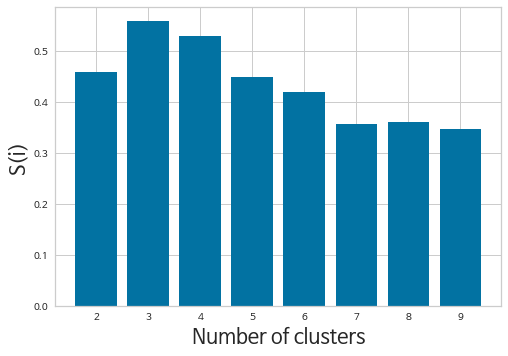

In [ ]:
silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(강서_df)
    silhouette_scores.append(silhouette_score(강서_df, m1.fit_predict(강서_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [ ]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  3


In [ ]:
k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(강서_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
강서_df['cluster'] = model.fit_predict(강서_df)

In [ ]:
강서_df['cluster'].value_counts()

0    10
1     7
2     3
Name: cluster, dtype: int64

In [ ]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers


array([[0.22480151, 0.16449591],
       [0.69553737, 0.08654638],
       [0.15524679, 0.79229382]])

In [ ]:
cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 강서_df['인구 수']
cluster_df['생활보호대상자 비율'] = 강서_df['생활보호대상자 비율']
cluster_df['cluster'] = 강서_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,염창동,0.707079,0.000000,1
1,등촌1동,0.251340,0.029012,0
2,등촌2동,0.170860,0.062718,0
3,등촌3동,0.440091,0.738492,2
4,화곡본동,0.525701,0.198022,1
5,화곡1동,1.000000,0.135656,1
6,화곡2동,0.106697,0.180734,0
7,화곡3동,0.189472,0.104623,0
8,화곡4동,0.175938,0.181971,0
9,화곡6동,0.271834,0.133629,0


In [ ]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,염창동,0.707079,0.000000,1
1,등촌1동,0.251340,0.029012,0
2,등촌2동,0.170860,0.062718,0
3,등촌3동,0.440091,0.738492,2
4,화곡본동,0.525701,0.198022,1
5,화곡1동,1.000000,0.135656,1
6,화곡2동,0.106697,0.180734,0
7,화곡3동,0.189472,0.104623,0
8,화곡4동,0.175938,0.181971,0
9,화곡6동,0.271834,0.133629,0


#### **군집화**

In [ ]:
for i in range(number_of_clusters):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['등촌1동', '등촌2동', '화곡2동', '화곡3동', '화곡4동', '화곡6동', '화곡8동', '공항동', '방화2동', '방화3동']
cluster 1 :  ['염창동', '화곡본동', '화곡1동', '가양1동', '발산1동', '방화1동', '우장산동']
cluster 2 :  ['등촌3동', '가양2동', '가양3동']


#### **입지선정**
- cluster0 : 1개 (화곡4동)
- cluster1 : 1개 (방화1동)
- cluster2 : 0개

In [ ]:
# cluster0

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 0:
    lst.append([(cluster_df['population'][i]-centers[0][0])**2 + (cluster_df['ratio'][i]-centers[0][1])**2, i])
  
lst

[[0.01906018453843275, 1],
 [0.013268497147790695, 2],
 [0.014212293117362742, 6],
 [0.0048329539587576254, 7],
 [0.0026929973983107723, 8],
 [0.0031648344246137583, 9],
 [0.0037990611594779077, 10],
 [0.012437749254215995, 15],
 [0.010658875701699677, 17],
 [0.04279795521144803, 18]]

In [ ]:
lst.sort()
lst

[[0.0026929973983107723, 8],
 [0.0031648344246137583, 9],
 [0.0037990611594779077, 10],
 [0.0048329539587576254, 7],
 [0.010658875701699677, 17],
 [0.012437749254215995, 15],
 [0.013268497147790695, 2],
 [0.014212293117362742, 6],
 [0.01906018453843275, 1],
 [0.04279795521144803, 18]]

In [ ]:
cluster_df.loc[[8]]

,dong,population,ratio,cluster
8,화곡4동,0.175938,0.181971,0


In [ ]:
# cluster1

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 1:
    lst.append([(cluster_df['population'][i]-centers[1][0])**2 + (cluster_df['ratio'][i]-centers[1][1])**2, i])
  
lst

[[0.007623479850495225, 0],
 [0.041271194887629536, 4],
 [0.09510925643654174, 5],
 [0.037995059334991955, 11],
 [0.012562733227992992, 14],
 [0.005943255066132197, 16],
 [0.006378195416335344, 19]]

In [ ]:
lst.sort()
lst

[[0.005943255066132197, 16],
 [0.006378195416335344, 19],
 [0.007623479850495225, 0],
 [0.012562733227992992, 14],
 [0.037995059334991955, 11],
 [0.041271194887629536, 4],
 [0.09510925643654174, 5]]

In [ ]:
cluster_df.loc[[16]]

,dong,population,ratio,cluster
16,방화1동,0.772376,0.092801,1


#### **시각화**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '생활보호대상자 비율')

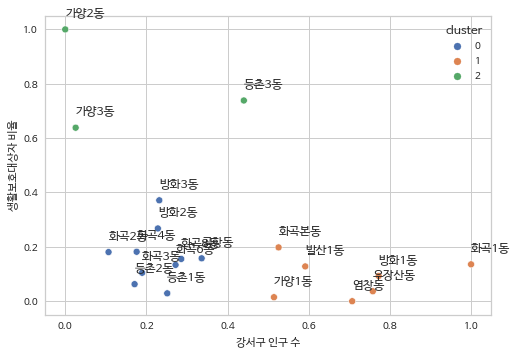

In [ ]:
sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

for i in range(len(cluster_df)):
  plt.annotate(cluster_df['dong'][i], (cluster_df['population'][i], cluster_df['ratio'][i]+0.05))


plt.xlabel('강서구 인구 수')
plt.ylabel('생활보호대상자 비율')

In [ ]:
# cluster_df.to_csv('/content/drive/MyDrive/project/14. 시각화/gangseo_cluster.csv')

### 1-6. 강동구

In [ ]:
강동_df = pd.read_csv('/content/drive/MyDrive/project/12. 공체시설 부족 자치구/2020 강동구.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] = 강동_df['동']

강동_df =  강동_df.iloc[:,1:]
강동_df

,인구 수,생활보호대상자 비율
0,0.709844,0.199185
1,0.560336,0.256057
2,0.371047,0.200675
3,0.554457,0.232097
4,0.478608,0.460345
5,0.760975,0.948967
6,0.327104,0.189557
7,0.389606,0.137652
8,0.589688,0.977770
9,0.750740,1.000000


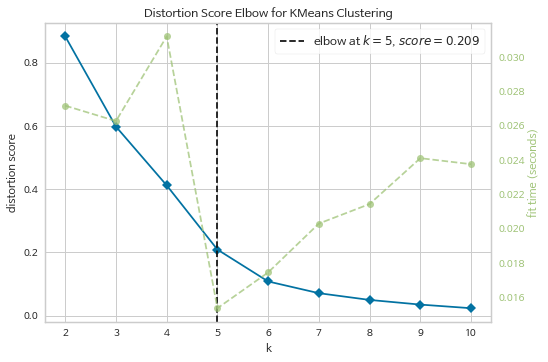

In [ ]:
km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(강동_df)
Elbow_M.show()

plt.show()

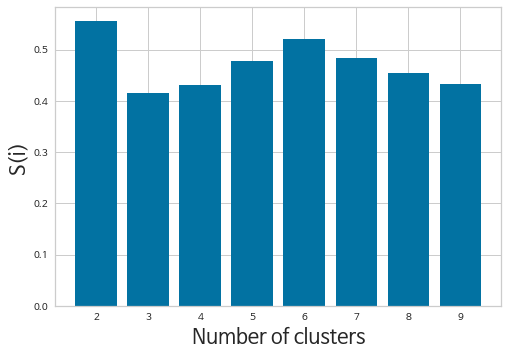

In [ ]:
silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(강동_df)
    silhouette_scores.append(silhouette_score(강동_df, m1.fit_predict(강동_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [ ]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  2


#### 적절한 k값 찾기

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


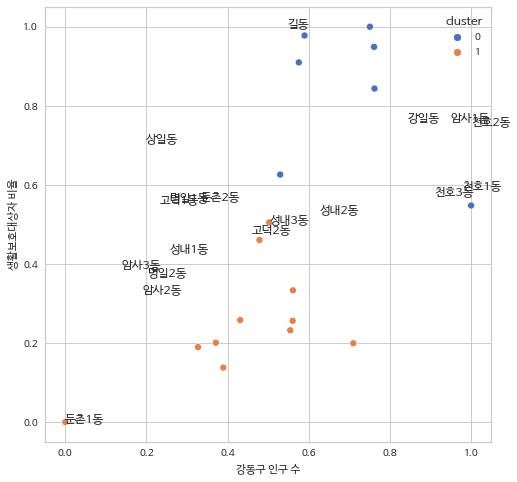

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


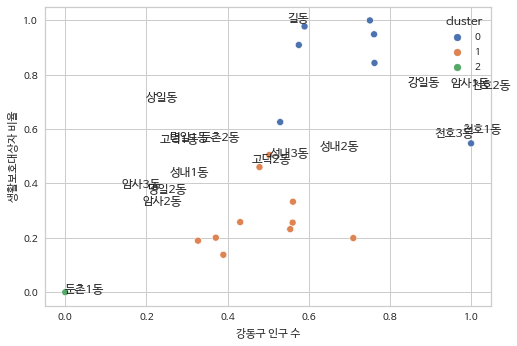

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


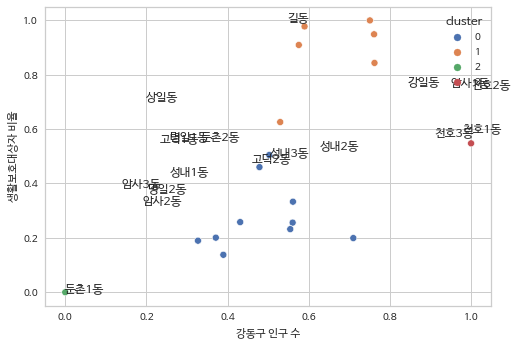

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


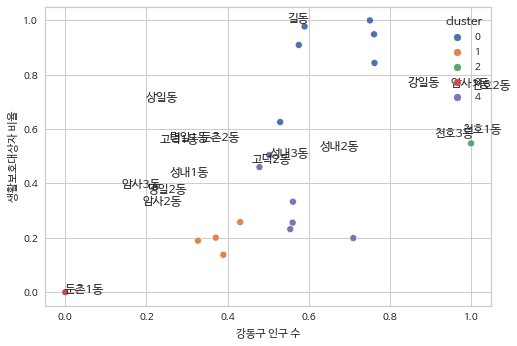

In [ ]:
plt.figure(figsize = (8, 8))

for i in range(2,6):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(강동_df)
  강동_df['cluster'] = model.fit_predict(강동_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 강동_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 강동_df['생활보호대상자 비율']
  cluster_df['cluster'] = 강동_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('강동구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=4로 결정

In [ ]:
k = 4

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(강동_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
강동_df['cluster'] = model.fit_predict(강동_df)

In [ ]:
강동_df['cluster'].value_counts()

0    7
2    5
1    5
3    1
Name: cluster, dtype: int64

In [ ]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.55667878, 0.37307019],
       [0.68779556, 0.93598145],
       [0.30376776, 0.15717248],
       [1.        , 0.54770267]])

In [ ]:
cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 강동_df['인구 수']
cluster_df['생활보호대상자 비율'] = 강동_df['생활보호대상자 비율']
cluster_df['cluster'] = 강동_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,상일동,0.709844,0.199185,0
1,명일1동,0.560336,0.256057,0
2,명일2동,0.371047,0.200675,2
3,고덕1동,0.554457,0.232097,0
4,고덕2동,0.478608,0.460345,0
5,암사1동,0.760975,0.948967,1
6,암사2동,0.327104,0.189557,2
7,암사3동,0.389606,0.137652,2
8,천호1동,0.589688,0.977770,1
9,천호2동,0.750740,1.000000,1


In [ ]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,상일동,0.709844,0.199185,0
1,명일1동,0.560336,0.256057,0
2,명일2동,0.371047,0.200675,2
3,고덕1동,0.554457,0.232097,0
4,고덕2동,0.478608,0.460345,0
5,암사1동,0.760975,0.948967,1
6,암사2동,0.327104,0.189557,2
7,암사3동,0.389606,0.137652,2
8,천호1동,0.589688,0.977770,1
9,천호2동,0.750740,1.000000,1


#### **군집화**

In [ ]:
for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['상일동', '명일1동', '고덕1동', '고덕2동', '성내2동', '성내3동', '둔촌2동']
cluster 1 :  ['암사1동', '천호1동', '천호2동', '천호3동', '강일동']
cluster 2 :  ['명일2동', '암사2동', '암사3동', '성내1동', '둔촌1동']
cluster 3 :  ['길동']


#### **입지선정**
- cluster1 : 1개 (암사1동)

In [ ]:
# cluster1

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 1:
    lst.append([(cluster_df['population'][i]-centers[1][0])**2 + (cluster_df['ratio'][i]-centers[1][1])**2, i])
  
lst

[[0.005523846501270646, 5],
 [0.01137139498493961, 8],
 [0.008060408295430898, 9],
 [0.013298244344433495, 10],
 [0.014060325284164493, 17]]

In [ ]:
lst.sort()
lst

[[0.005523846501270646, 5],
 [0.008060408295430898, 9],
 [0.01137139498493961, 8],
 [0.013298244344433495, 10],
 [0.014060325284164493, 17]]

In [ ]:
cluster_df.loc[[5]]

,dong,population,ratio,cluster
5,암사1동,0.760975,0.948967,1


#### **시각화**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '생활보호대상자 비율')

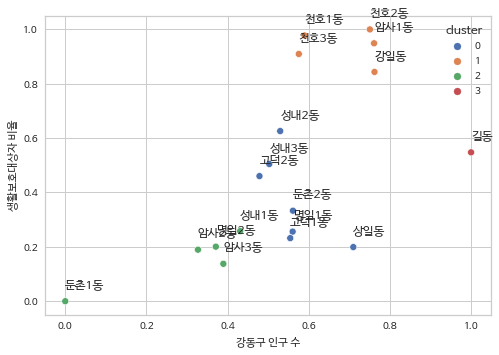

In [ ]:
sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

for i in range(len(cluster_df)):
  plt.annotate(cluster_df['dong'][i], (cluster_df['population'][i], cluster_df['ratio'][i]+0.05))


plt.xlabel('강동구 인구 수')
plt.ylabel('생활보호대상자 비율')

In [ ]:
# cluster_df.to_csv('/content/drive/MyDrive/project/14. 시각화/gangdong_cluster.csv')

### 1-7. 동작구

In [ ]:
동작_df = pd.read_csv('/content/drive/MyDrive/project/12. 공체시설 부족 자치구/2020 동작구.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] = 동작_df['동']

동작_df =  동작_df.iloc[:,1:]
동작_df

,인구 수,생활보호대상자 비율
0,0.566341,0.285400
1,0.000000,1.000000
2,1.000000,0.140209
3,0.439570,0.047910
4,0.357177,0.336975
5,0.473896,0.407754
6,0.303649,0.250724
7,0.424448,0.000000
8,0.352016,0.038223
9,0.032615,0.380682


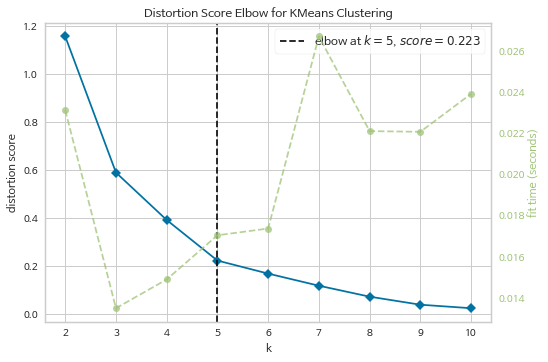

In [ ]:
km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(동작_df)
Elbow_M.show()

plt.show()

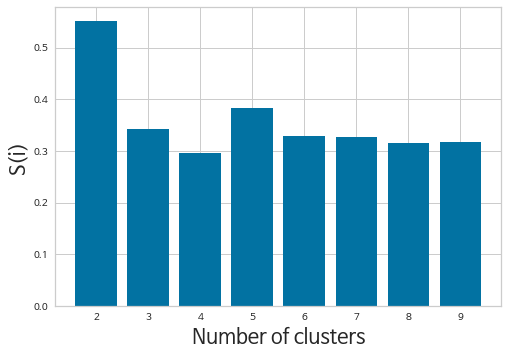

In [ ]:
silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(동작_df)
    silhouette_scores.append(silhouette_score(동작_df, m1.fit_predict(동작_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [ ]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  2


#### 적절한 k값 찾기

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


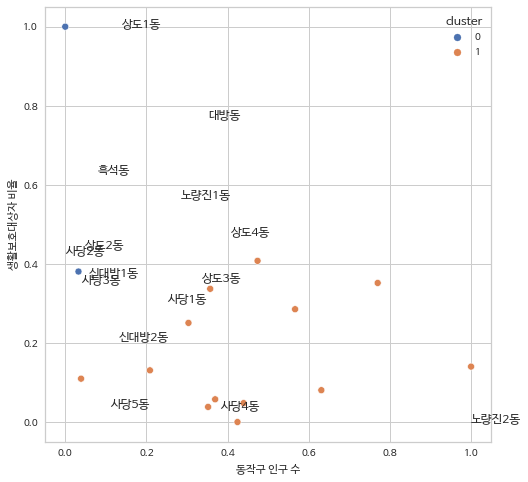

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


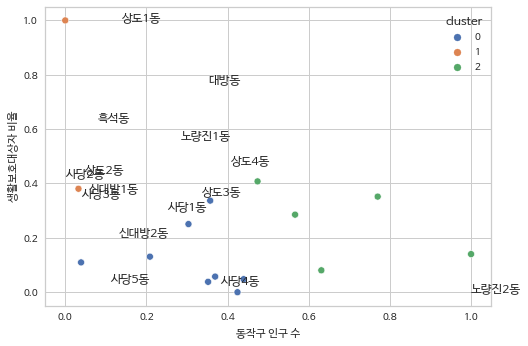

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


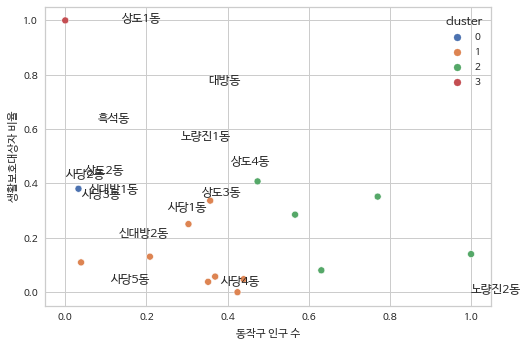

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


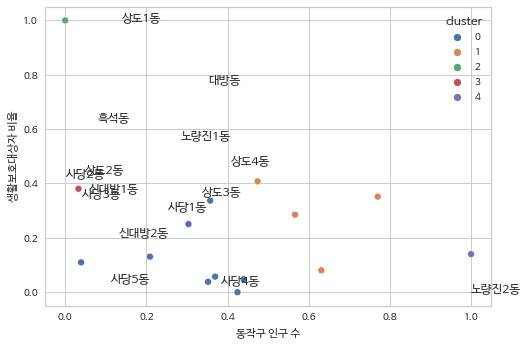

In [ ]:
plt.figure(figsize = (8, 8))

for i in range(2,6):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(동작_df)
  동작_df['cluster'] = model.fit_predict(동작_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 동작_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 동작_df['생활보호대상자 비율']
  cluster_df['cluster'] = 동작_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('동작구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=3으로 결정

In [ ]:
k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(동작_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
동작_df['cluster'] = model.fit_predict(동작_df)

In [ ]:
동작_df['cluster'].value_counts()

0    9
1    5
2    1
Name: cluster, dtype: int64

In [ ]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.28072158, 0.15027929],
       [0.68824412, 0.25314106],
       [0.        , 1.        ]])

In [ ]:
cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 동작_df['인구 수']
cluster_df['생활보호대상자 비율'] = 동작_df['생활보호대상자 비율']
cluster_df['cluster'] = 동작_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,노량진1동,0.566341,0.285400,1
1,노량진2동,0.000000,1.000000,2
2,상도1동,1.000000,0.140209,1
3,상도2동,0.439570,0.047910,0
4,상도3동,0.357177,0.336975,0
5,상도4동,0.473896,0.407754,1
6,사당1동,0.303649,0.250724,0
7,사당2동,0.424448,0.000000,0
8,사당3동,0.352016,0.038223,0
9,사당4동,0.032615,0.380682,0


In [ ]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,노량진1동,0.566341,0.285400,1
1,노량진2동,0.000000,1.000000,2
2,상도1동,1.000000,0.140209,1
3,상도2동,0.439570,0.047910,0
4,상도3동,0.357177,0.336975,0
5,상도4동,0.473896,0.407754,1
6,사당1동,0.303649,0.250724,0
7,사당2동,0.424448,0.000000,0
8,사당3동,0.352016,0.038223,0
9,사당4동,0.032615,0.380682,0


#### **군집화**

In [ ]:
for i in range(3):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['상도2동', '상도3동', '사당1동', '사당2동', '사당3동', '사당4동', '사당5동', '신대방1동', '신대방2동']
cluster 1 :  ['노량진1동', '상도1동', '상도4동', '대방동', '흑석동']
cluster 2 :  ['노량진2동']


#### **입지선정**
- cluster1 : 1개 (노량진1동)

In [ ]:
# cluster1

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 1:
    lst.append([(cluster_df['population'][i]-centers[1][0])**2 + (cluster_df['ratio'][i]-centers[1][1])**2, i])
  
lst

[[0.01590113305080174, 0],
 [0.10994535771877464, 2],
 [0.06985039211723632, 5],
 [0.016398626292687013, 11],
 [0.03304922821832613, 14]]

In [ ]:
lst.sort()
lst

[[0.01590113305080174, 0],
 [0.016398626292687013, 11],
 [0.03304922821832613, 14],
 [0.06985039211723632, 5],
 [0.10994535771877464, 2]]

In [ ]:
cluster_df.loc[[0]]

,dong,population,ratio,cluster
0,노량진1동,0.566341,0.2854,1


#### **시각화**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '생활보호대상자 비율')

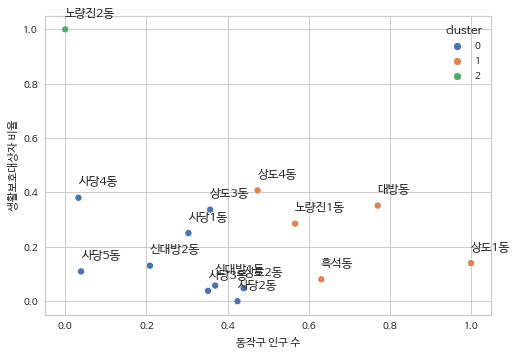

In [ ]:
sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

for i in range(len(cluster_df)):
  plt.annotate(cluster_df['dong'][i], (cluster_df['population'][i], cluster_df['ratio'][i]+0.05))


plt.xlabel('동작구 인구 수')
plt.ylabel('생활보호대상자 비율')

In [ ]:
# cluster_df.to_csv('/content/drive/MyDrive/project/14. 시각화/dongjak_cluster.csv')

### 1-8. 성동구

In [ ]:
성동_df = pd.read_csv('/content/drive/MyDrive/project/12. 공체시설 부족 자치구/2020 성동구.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] = 성동_df['동']

성동_df =  성동_df.iloc[:,1:]
성동_df

,인구 수,생활보호대상자 비율
0,0.381453,0.325889
1,0.748921,0.417782
2,0.144056,0.074033
3,0.195804,0.281975
4,0.791000,0.451990
5,0.284646,0.000000
6,0.282882,0.752382
7,0.224932,0.298005
8,0.347096,0.387550
9,0.157799,0.132421


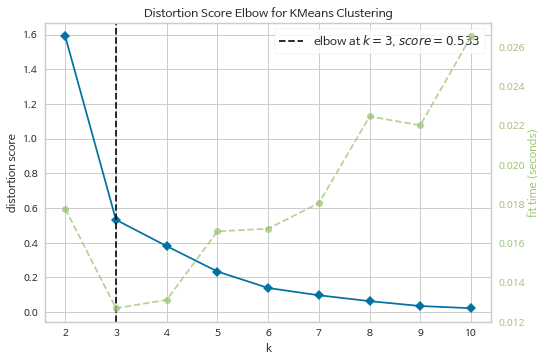

In [ ]:
km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(성동_df)
Elbow_M.show()

plt.show()

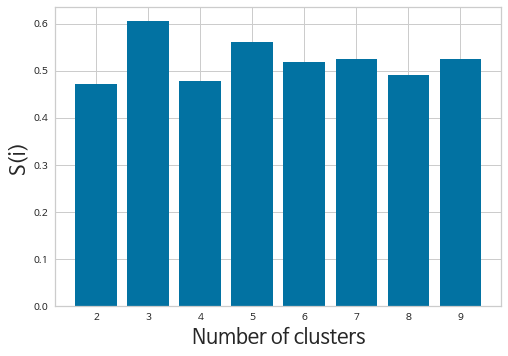

In [ ]:
silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(성동_df)
    silhouette_scores.append(silhouette_score(성동_df, m1.fit_predict(성동_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [ ]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  3


In [ ]:
k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(성동_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
성동_df['cluster'] = model.fit_predict(성동_df)

In [ ]:
성동_df['cluster'].value_counts()

1    8
2    5
0    4
Name: cluster, dtype: int64

In [ ]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.18601399, 0.83405452],
       [0.21935999, 0.2053106 ],
       [0.85106719, 0.35202917]])

In [ ]:
cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 성동_df['인구 수']
cluster_df['생활보호대상자 비율'] = 성동_df['생활보호대상자 비율']
cluster_df['cluster'] = 성동_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,왕십리2동,0.381453,0.325889,1
1,마장동,0.748921,0.417782,2
2,사근동,0.144056,0.074033,1
3,행당1동,0.195804,0.281975,1
4,행당2동,0.791000,0.451990,2
5,응봉동,0.284646,0.000000,1
6,금호1가동,0.282882,0.752382,0
7,금호4가동,0.224932,0.298005,1
8,성수1가1동,0.347096,0.387550,1
9,성수1가2동,0.157799,0.132421,1


In [ ]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,왕십리2동,0.381453,0.325889,1
1,마장동,0.748921,0.417782,2
2,사근동,0.144056,0.074033,1
3,행당1동,0.195804,0.281975,1
4,행당2동,0.791000,0.451990,2
5,응봉동,0.284646,0.000000,1
6,금호1가동,0.282882,0.752382,0
7,금호4가동,0.224932,0.298005,1
8,성수1가1동,0.347096,0.387550,1
9,성수1가2동,0.157799,0.132421,1


#### **군집화**

In [ ]:
for i in range(number_of_clusters):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['금호1가동', '성수2가1동', '송정동', '용답동']
cluster 1 :  ['왕십리2동', '사근동', '행당1동', '응봉동', '금호4가동', '성수1가1동', '성수1가2동', '성수2가3동']
cluster 2 :  ['마장동', '행당2동', '왕십리도선동', '금호2.3가동', '옥수동']


#### **입지선정**
- cluster2 : 1개 (금호2.3가동)

In [ ]:
# cluster2

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 2:
    lst.append([(cluster_df['population'][i]-centers[2][0])**2 + (cluster_df['ratio'][i]-centers[2][1])**2, i])
  
lst

[[0.014757314123925173, 1],
 [0.013600197912732852, 4],
 [0.023741866279646147, 14],
 [0.011284566221884867, 15],
 [0.07596685579804147, 16]]

In [ ]:
lst.sort()
lst

[[0.011284566221884867, 15],
 [0.013600197912732852, 4],
 [0.014757314123925173, 1],
 [0.023741866279646147, 14],
 [0.07596685579804147, 16]]

In [ ]:
cluster_df.loc[[15]]

,dong,population,ratio,cluster
15,금호2.3가동,0.756522,0.400462,2


#### **시각화**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '생활보호대상자 비율')

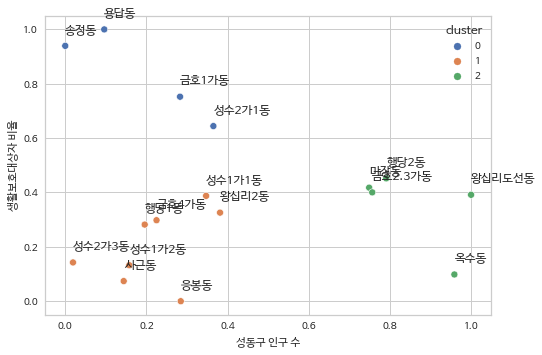

In [ ]:
sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

for i in range(len(cluster_df)):
  plt.annotate(cluster_df['dong'][i], (cluster_df['population'][i], cluster_df['ratio'][i]+0.05))


plt.xlabel('성동구 인구 수')
plt.ylabel('생활보호대상자 비율')

In [ ]:
# cluster_df.to_csv('/content/drive/MyDrive/project/14. 시각화/seongdong_cluster.csv')

### 1-9. 동대문구

In [ ]:
동대문_df = pd.read_csv('/content/drive/MyDrive/project/12. 공체시설 부족 자치구/2020 동대문구.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] = 동대문_df['동']

동대문_df =  동대문_df.iloc[:,1:]
동대문_df

,인구 수,생활보호대상자 비율
0,0.678298,0.533668
1,0.254883,0.250962
2,0.632813,0.061391
3,0.631873,0.302652
4,1.000000,0.273644
5,0.776593,0.203619
6,0.000000,0.033360
7,0.101375,0.000000
8,0.463078,0.024155
9,0.320838,0.152471


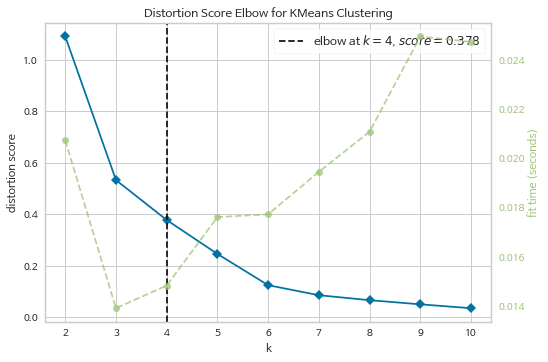

In [ ]:
km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(동대문_df)
Elbow_M.show()

plt.show()

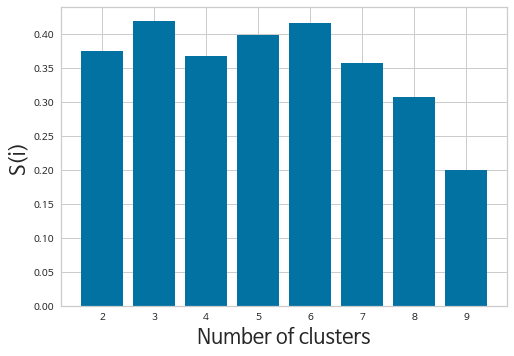

In [ ]:
silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(동대문_df)
    silhouette_scores.append(silhouette_score(동대문_df, m1.fit_predict(동대문_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [ ]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  3


#### 적절한 k값 찾기

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


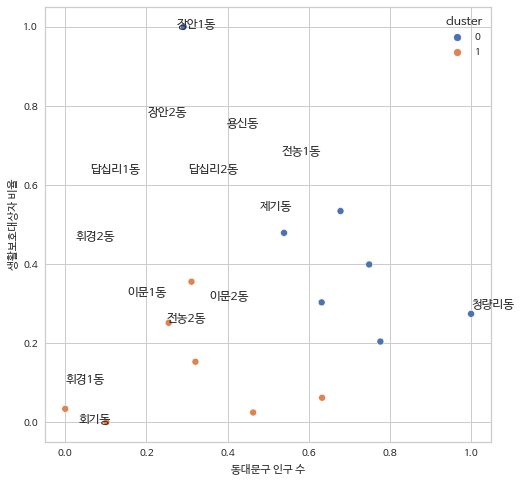

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


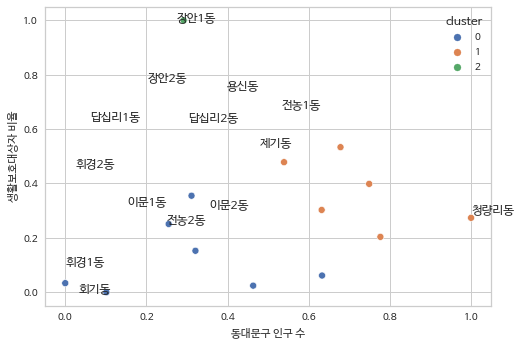

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


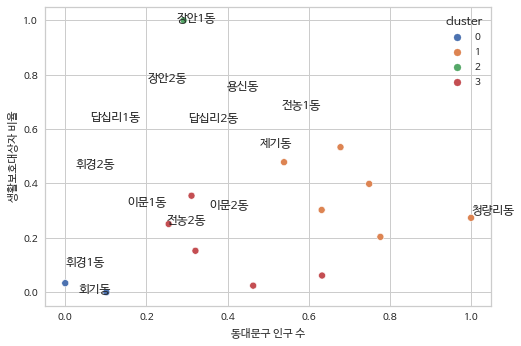

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


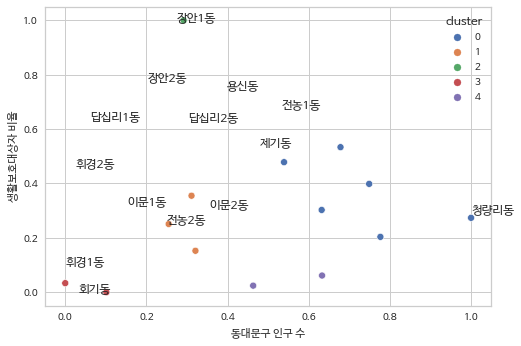

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


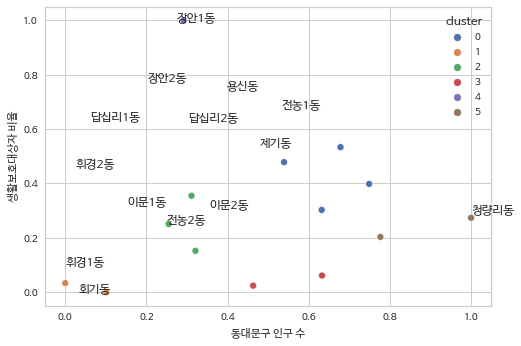

In [ ]:
plt.figure(figsize = (8, 8))

for i in range(2,7):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(동대문_df)
  동대문_df['cluster'] = model.fit_predict(동대문_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 동대문_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 동대문_df['생활보호대상자 비율']
  cluster_df['cluster'] = 동대문_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('동대문구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

In [ ]:
k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(동대문_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
동대문_df['cluster'] = model.fit_predict(동대문_df)

In [ ]:
동대문_df['cluster'].value_counts()

2    7
1    6
0    1
Name: cluster, dtype: int64

In [ ]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.29180439, 1.        ],
       [0.24188702, 0.13599631],
       [0.71537496, 0.32171814]])

In [ ]:
cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 동대문_df['인구 수']
cluster_df['생활보호대상자 비율'] = 동대문_df['생활보호대상자 비율']
cluster_df['cluster'] = 동대문_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,전농1동,0.678298,0.533668,2
1,전농2동,0.254883,0.250962,1
2,답십리1동,0.632813,0.061391,2
3,답십리2동,0.631873,0.302652,2
4,장안1동,1.000000,0.273644,2
5,장안2동,0.776593,0.203619,2
6,회기동,0.000000,0.033360,1
7,휘경1동,0.101375,0.000000,1
8,휘경2동,0.463078,0.024155,1
9,이문1동,0.320838,0.152471,1


In [ ]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,전농1동,0.678298,0.533668,2
1,전농2동,0.254883,0.250962,1
2,답십리1동,0.632813,0.061391,2
3,답십리2동,0.631873,0.302652,2
4,장안1동,1.000000,0.273644,2
5,장안2동,0.776593,0.203619,2
6,회기동,0.000000,0.033360,1
7,휘경1동,0.101375,0.000000,1
8,휘경2동,0.463078,0.024155,1
9,이문1동,0.320838,0.152471,1


#### **군집화**

In [ ]:
for i in range(number_of_clusters):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['청량리동']
cluster 1 :  ['전농2동', '회기동', '휘경1동', '휘경2동', '이문1동', '이문2동']
cluster 2 :  ['전농1동', '답십리1동', '답십리2동', '장안1동', '장안2동', '용신동', '제기동']


#### **입지선정**
- cluster1 : 1개 (이문1동)

In [ ]:
# cluster1

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 1:
    lst.append([(cluster_df['population'][i]-centers[1][0])**2 + (cluster_df['ratio'][i]-centers[1][1])**2, i])
  
lst

[[0.013385897995153186, 1],
 [0.06904345242780713, 6],
 [0.03823870897799049, 7],
 [0.06143410801358663, 8],
 [0.00650471053442853, 9],
 [0.052772958973816265, 10]]

In [ ]:
lst.sort()
lst

[[0.00650471053442853, 9],
 [0.013385897995153186, 1],
 [0.03823870897799049, 7],
 [0.052772958973816265, 10],
 [0.06143410801358663, 8],
 [0.06904345242780713, 6]]

In [ ]:
cluster_df.loc[[9]]

,dong,population,ratio,cluster
9,이문1동,0.320838,0.152471,1


#### **시각화**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '생활보호대상자 비율')

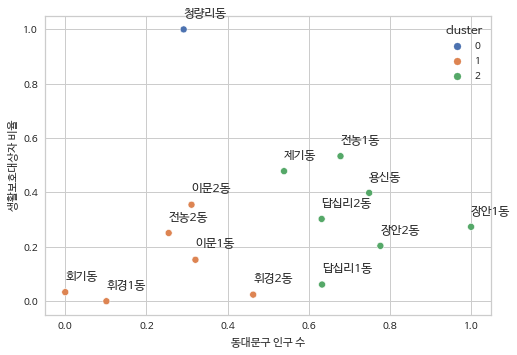

In [ ]:
sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

for i in range(len(cluster_df)):
  plt.annotate(cluster_df['dong'][i], (cluster_df['population'][i], cluster_df['ratio'][i]+0.05))


plt.xlabel('동대문구 인구 수')
plt.ylabel('생활보호대상자 비율')

In [ ]:
# cluster_df.to_csv('/content/drive/MyDrive/project/14. 시각화/dongdaemun_cluster.csv')

### 1-10. 중랑구

In [ ]:
중랑_df = pd.read_csv('/content/drive/MyDrive/project/12. 공체시설 부족 자치구/2020 중랑구.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] = 중랑_df['동']

중랑_df =  중랑_df.iloc[:,1:]
중랑_df

,인구 수,생활보호대상자 비율
0,0.419269,0.524762
1,0.183115,0.782755
2,0.000000,0.260007
3,0.319944,0.232167
4,0.407271,0.462656
5,0.220620,0.259581
6,0.228010,0.214089
7,0.453397,0.888259
8,0.831426,0.000000
9,0.199086,0.284251


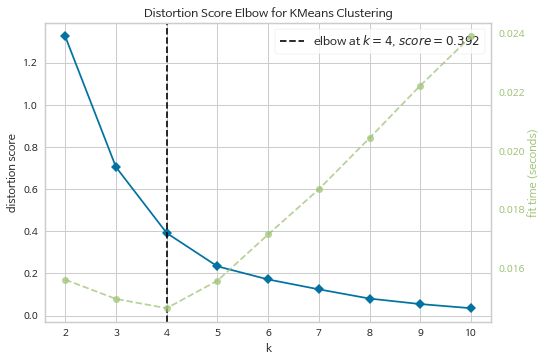

In [ ]:
km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(중랑_df)
Elbow_M.show()

plt.show()

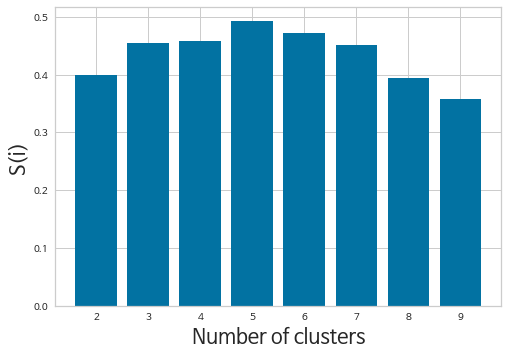

In [ ]:
silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(중랑_df)
    silhouette_scores.append(silhouette_score(중랑_df, m1.fit_predict(중랑_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [ ]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  5


#### 적절한 k값 찾기

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


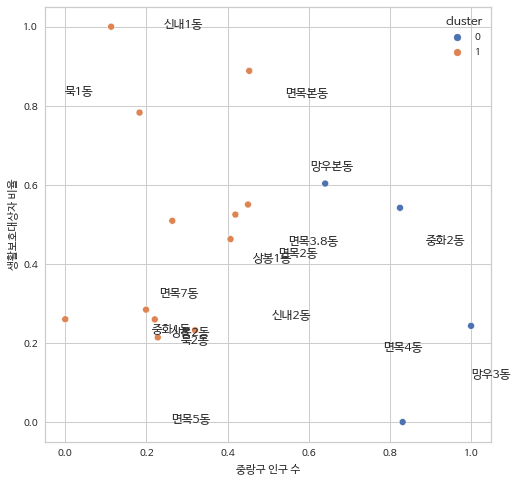

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


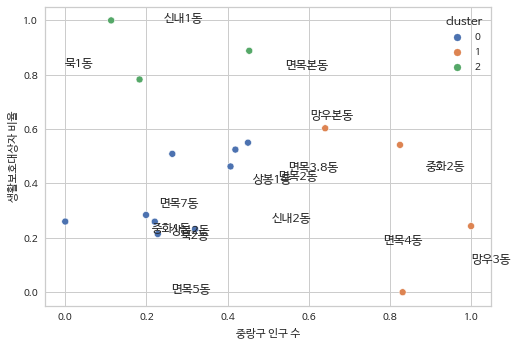

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


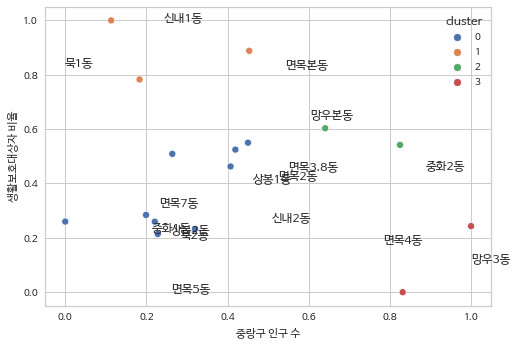

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


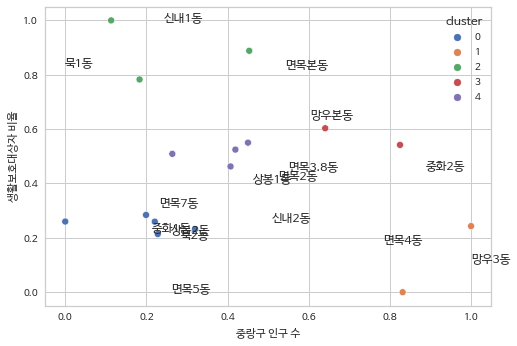

In [ ]:
plt.figure(figsize = (8, 8))

for i in range(2,6):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(중랑_df)
  중랑_df['cluster'] = model.fit_predict(중랑_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 중랑_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 중랑_df['생활보호대상자 비율']
  cluster_df['cluster'] = 중랑_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('중랑구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=4로 결정

In [ ]:
k = 4

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(중랑_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
중랑_df['cluster'] = model.fit_predict(중랑_df)

In [ ]:
중랑_df['cluster'].value_counts()

3    5
0    5
2    3
1    3
Name: cluster, dtype: int64

In [ ]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.19353198, 0.25001877],
       [0.88544564, 0.26171487],
       [0.24987419, 0.89033804],
       [0.4362495 , 0.52998592]])

In [ ]:
cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 중랑_df['인구 수']
cluster_df['생활보호대상자 비율'] = 중랑_df['생활보호대상자 비율']
cluster_df['cluster'] = 중랑_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,면목2동,0.419269,0.524762,3
1,면목4동,0.183115,0.782755,2
2,면목5동,0.000000,0.260007,0
3,면목7동,0.319944,0.232167,0
4,상봉1동,0.407271,0.462656,3
5,상봉2동,0.220620,0.259581,0
6,중화1동,0.228010,0.214089,0
7,중화2동,0.453397,0.888259,2
8,묵1동,0.831426,0.000000,1
9,묵2동,0.199086,0.284251,0


In [ ]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,면목2동,0.419269,0.524762,3
1,면목4동,0.183115,0.782755,2
2,면목5동,0.000000,0.260007,0
3,면목7동,0.319944,0.232167,0
4,상봉1동,0.407271,0.462656,3
5,상봉2동,0.220620,0.259581,0
6,중화1동,0.228010,0.214089,0
7,중화2동,0.453397,0.888259,2
8,묵1동,0.831426,0.000000,1
9,묵2동,0.199086,0.284251,0


#### **군집화**

In [ ]:
for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['면목5동', '면목7동', '상봉2동', '중화1동', '묵2동']
cluster 1 :  ['묵1동', '신내1동', '면목본동']
cluster 2 :  ['면목4동', '중화2동', '망우3동']
cluster 3 :  ['면목2동', '상봉1동', '신내2동', '면목3.8동', '망우본동']


#### **입지선정**
- cluster1 : 1개 (신내1동)

In [ ]:
# cluster1

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 1:
    lst.append([(cluster_df['population'][i]-centers[1][0])**2 + (cluster_df['ratio'][i]-centers[1][1])**2, i])
  
lst

[[0.07141275915488601, 8],
 [0.013464820263986797, 11],
 [0.08218286116794893, 13]]

In [ ]:
lst.sort()
lst

[[0.013464820263986797, 11],
 [0.07141275915488601, 8],
 [0.08218286116794893, 13]]

In [ ]:
cluster_df.loc[[11]]

,dong,population,ratio,cluster
11,신내1동,1.0,0.243218,1


#### **시각화**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '생활보호대상자 비율')

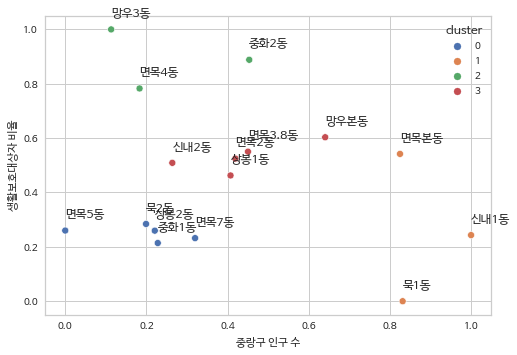

In [ ]:
sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

for i in range(len(cluster_df)):
  plt.annotate(cluster_df['dong'][i], (cluster_df['population'][i], cluster_df['ratio'][i]+0.05))


plt.xlabel('중랑구 인구 수')
plt.ylabel('생활보호대상자 비율')

In [ ]:
# cluster_df.to_csv('/content/drive/MyDrive/project/14. 시각화/jungnang_cluster.csv')

### 1-11. 성북구

In [ ]:
성북_df = pd.read_csv('/content/drive/MyDrive/project/12. 공체시설 부족 자치구/2020 성북구.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] = 성북_df['동']

성북_df =  성북_df.iloc[:,1:]
성북_df

,인구 수,생활보호대상자 비율
0,0.046721,0.327399
1,0.388300,0.000000
2,0.090799,0.175544
3,0.074026,0.214540
4,0.177010,0.064913
5,0.353433,0.222196
6,0.100598,0.424482
7,0.436268,0.215889
8,0.824384,0.007146
9,0.112343,0.168273


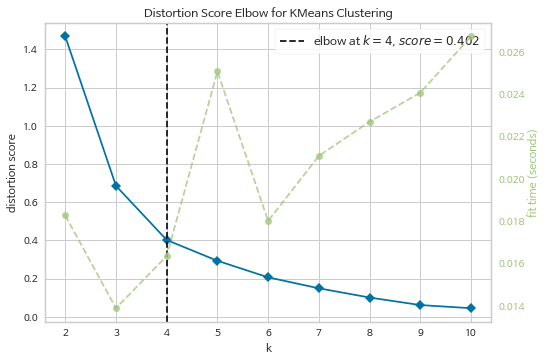

In [ ]:
km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(성북_df)
Elbow_M.show()

plt.show()

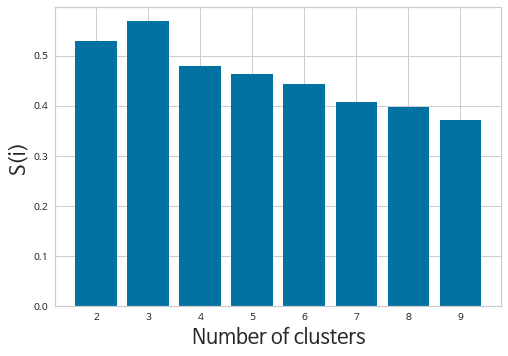

In [ ]:
silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(성북_df)
    silhouette_scores.append(silhouette_score(성북_df, m1.fit_predict(성북_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [ ]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  3


#### 적절한 k값 찾기

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


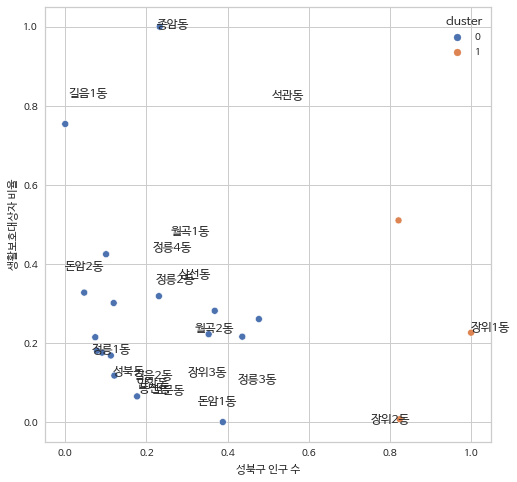

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


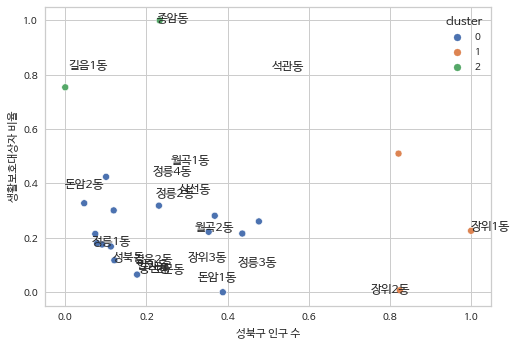

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


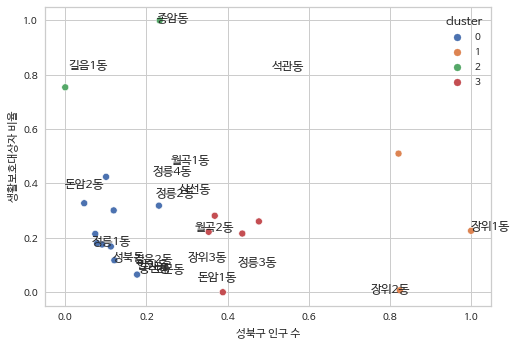

In [ ]:
plt.figure(figsize = (8, 8))

for i in range(2,5):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(성북_df)
  성북_df['cluster'] = model.fit_predict(성북_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 성북_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 성북_df['생활보호대상자 비율']
  cluster_df['cluster'] = 성북_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('성북구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=3로 결정

In [ ]:
k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(성북_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
성북_df['cluster'] = model.fit_predict(성북_df)

In [ ]:
성북_df['cluster'].value_counts()

2    15
1     3
0     2
Name: cluster, dtype: int64

In [ ]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.11639814, 0.87694042],
       [0.88188302, 0.24771903],
       [0.21166122, 0.21816803]])

In [ ]:
cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 성북_df['인구 수']
cluster_df['생활보호대상자 비율'] = 성북_df['생활보호대상자 비율']
cluster_df['cluster'] = 성북_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,돈암1동,0.046721,0.327399,2
1,돈암2동,0.388300,0.000000,2
2,안암동,0.090799,0.175544,2
3,보문동,0.074026,0.214540,2
4,정릉1동,0.177010,0.064913,2
5,정릉2동,0.353433,0.222196,2
6,정릉3동,0.100598,0.424482,2
7,정릉4동,0.436268,0.215889,2
8,길음1동,0.824384,0.007146,1
9,길음2동,0.112343,0.168273,2


In [ ]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,돈암1동,0.046721,0.327399,2
1,돈암2동,0.388300,0.000000,2
2,안암동,0.090799,0.175544,2
3,보문동,0.074026,0.214540,2
4,정릉1동,0.177010,0.064913,2
5,정릉2동,0.353433,0.222196,2
6,정릉3동,0.100598,0.424482,2
7,정릉4동,0.436268,0.215889,2
8,길음1동,0.824384,0.007146,1
9,길음2동,0.112343,0.168273,2


#### **군집화**

In [ ]:
for i in range(3):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['장위1동', '장위2동']
cluster 1 :  ['길음1동', '종암동', '석관동']
cluster 2 :  ['돈암1동', '돈암2동', '안암동', '보문동', '정릉1동', '정릉2동', '정릉3동', '정릉4동', '길음2동', '월곡1동', '월곡2동', '장위3동', '성북동', '삼선동', '동선동']


#### **입지선정**
- cluster0 : 1개 (장위1동)
- cluster1 : 0개
- cluster2 : 1개 (월곡2동)

In [ ]:
# cluster0

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 0:
    lst.append([(cluster_df['population'][i]-centers[0][0])**2 + (cluster_df['ratio'][i]-centers[0][1])**2, i])
  
lst

[[0.028692186331551822, 12], [0.028692186331551843, 13]]

In [ ]:
lst.sort()
lst

[[0.028692186331551822, 12], [0.028692186331551843, 13]]

In [ ]:
cluster_df.loc[[12]]

,dong,population,ratio,cluster
12,장위1동,0.232796,1.0,0


In [ ]:
# cluster2

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 2:
    lst.append([(cluster_df['population'][i]-centers[2][0])**2 + (cluster_df['ratio'][i]-centers[2][1])**2, i])
  
lst

[[0.039136665691194894, 0],
 [0.07879841601287078, 1],
 [0.01642452576455682, 2],
 [0.01895647771023334, 3],
 [0.02468788840985955, 4],
 [0.02011557625942893, 5],
 [0.054900437530906905, 6],
 [0.05045349553887923, 7],
 [0.012353734863734091, 9],
 [0.07229561102185329, 10],
 [0.010429700141649735, 11],
 [0.015383922510133465, 14],
 [0.018336598078105858, 15],
 [0.028558911853260628, 16],
 [0.019147124927769186, 17]]

In [ ]:
lst.sort()
lst

[[0.010429700141649735, 11],
 [0.012353734863734091, 9],
 [0.015383922510133465, 14],
 [0.01642452576455682, 2],
 [0.018336598078105858, 15],
 [0.01895647771023334, 3],
 [0.019147124927769186, 17],
 [0.02011557625942893, 5],
 [0.02468788840985955, 4],
 [0.028558911853260628, 16],
 [0.039136665691194894, 0],
 [0.05045349553887923, 7],
 [0.054900437530906905, 6],
 [0.07229561102185329, 10],
 [0.07879841601287078, 1]]

In [ ]:
cluster_df.loc[[11]]

,dong,population,ratio,cluster
11,월곡2동,0.230851,0.318475,2


#### **시각화**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '생활보호대상자 비율')

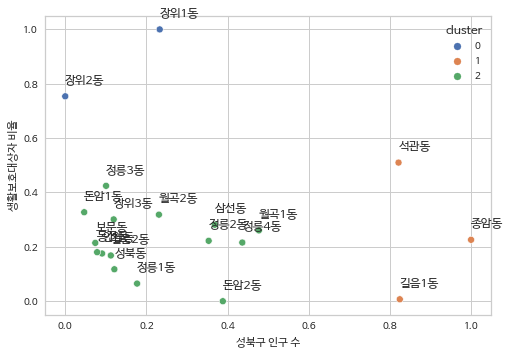

In [ ]:
sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

for i in range(len(cluster_df)):
  plt.annotate(cluster_df['dong'][i], (cluster_df['population'][i], cluster_df['ratio'][i]+0.05))


plt.xlabel('성북구 인구 수')
plt.ylabel('생활보호대상자 비율')

In [ ]:
# cluster_df.to_csv('/content/drive/MyDrive/project/14. 시각화/seongbuk_cluster.csv')